## Data Set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
name='data08.csv'
df = pd.DataFrame()

temp = pd.read_csv(name, sep='[;]+', engine='python')
data = df.append(temp, ignore_index=True)
data

,X,Y,result
0,0.443,0.189,0
1,0.444,0.291,1
2,0.445,0.145,0
3,0.446,0.653,1
4,0.447,0.560,0
...,...,...,...
95,0.538,0.468,0
96,0.539,0.331,0
97,0.540,0.262,0
98,0.541,0.069,0


## Data Inspection

In [3]:
data.head()

,X,Y,result
0,0.443,0.189,0
1,0.444,0.291,1
2,0.445,0.145,0
3,0.446,0.653,1
4,0.447,0.560,0


In [6]:
data.describe()

,X,Y,result
count,100.000000,100.000000,100.000000
mean,0.492500,0.478640,0.480000
std,0.029011,0.282088,0.502117
min,0.443000,0.003000,0.000000
25%,0.467750,0.205250,0.000000
50%,0.492500,0.491500,0.000000
75%,0.517250,0.685000,1.000000
max,0.542000,0.975000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
 2   result  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


array([[<AxesSubplot:xlabel='X', ylabel='X'>,
        <AxesSubplot:xlabel='Y', ylabel='X'>],
       [<AxesSubplot:xlabel='X', ylabel='Y'>,
        <AxesSubplot:xlabel='Y', ylabel='Y'>]], dtype=object)

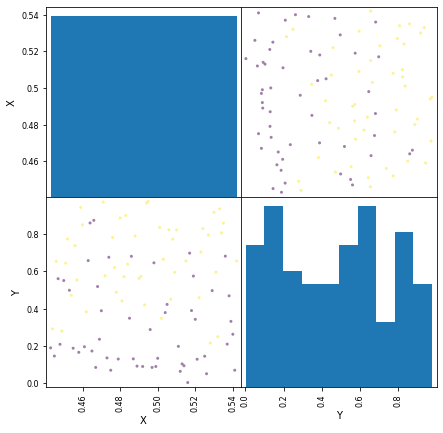

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['X', 'Y']], c=data['result'], figsize=(7,7))

## Data Prepration

In [10]:
# Independant Variables:
X = data[['X', 'Y']]
# Dependant (Target) Variable:
Y = data['result']


In [11]:
# split the data into train_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


In [12]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(Y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(Y_test))

How many samples do we have in our test and train datasets?
X_train:  (80, 2)
y_train:  (80,)
X_test:  (20, 2)
y_test:  (20,)


## Perceptron algorithm

In [13]:
#function activation
def step_function(x):
    if x > 0.5:
        return 1
    else:
        return 0

In [14]:
#forming arrays of train_data and test_data  

Y_train = np.array(Y_train)
X_train = np.array(X_train)
Y_test = np.array(Y_test)
X_test = np.array(X_test)


In [31]:
#random Synaptic weights
synaptic_weights = np.random.rand(2,1)

#parameter of learning rate
learning_rate = 1

outputs = np.zeros(80)
y_i = 0


### calculating on the train data

In [7]:
error_train = 1
while error_train > 0.5:
    list_errors = []
    result = []
    #Summation block
    for i in range(len(X_train)):
        y_i = step_function(np.dot(X_train[i], weights))
        result.append(step_function(y_i))
        if Y_train[i]*y_i <= 0:
            #weight correction
            synaptic_weights[0] = synaptic_weights[0] + np.multiply(learning_rate, np.dot(X_train[i][0], Y_train[i]))
            synaptic_weights[1] = synaptic_weights[1] + np.multiply(learning_rate, np.dot(X_train[i][1], Y_train[i]))
        #calculate error
        absolute_error = abs(Y_train[i] - step_function(y_i))
        if absolute_error == 1:
            list_errors.append(absolute_error)
    error_train = len(list_errors)/len(X_train)
print(synaptic_weights)

[[0.37782085]
 [0.46047752]]
[[0.83982085]
 [0.84247752]]


### calculating on the test data

In [26]:
list_errors_2 = []
Yi = []
#Summation block
for j in range(len(Y_test)):
    y_test = step_function(np.dot(X_test[j], synaptic_weights))
    Yi.append(y_test)
    #calculate error
    abcolute_error_2 = abs(Y_test[j] - y_test)
    if abcolute_error_2 == 1:
        list_errors_2.append(abcolute_error_2)
err_y = len(list_errors_2)/len(Y_test)

### calculated train data error

In [9]:
error_train

0.425

### calculated test data error

In [10]:
error_test

0.35

## displaying the outputs from test_data

In [16]:
print("in the test data we have such results", Y_test)

in the test data we have such results [1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0]


## displaying the predected outputs 

In [30]:
print("our algorithm predected such results", Yi)

our algorithm predected such results [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]
